In [ ]:
from google.colab import files
unpload = files.upload()

Saving case_time_series.csv to case_time_series.csv


In [319]:
import pandas as pd
df = pd.read_csv("https://api.covid19india.org/csv/latest/case_time_series.csv",parse_dates=["Date"], index_col= 'Date')
df.index.freq ='D'
df

,Date_YMD,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
Date,,,,,,,
2020-01-30,2020-01-30,1,1,0,0,0,0
2020-01-31,2020-01-31,0,1,0,0,0,0
2020-02-01,2020-02-01,0,1,0,0,0,0
2020-02-02,2020-02-02,1,2,0,0,0,0
2020-02-03,2020-02-03,1,3,0,0,0,0
...,...,...,...,...,...,...,...
2021-06-13,2021-06-13,71001,29509860,119574,28155317,3922,373738
2021-06-14,2021-06-14,60008,29569868,117376,28272693,2733,376471
2021-06-15,2021-06-15,62215,29632083,107776,28380469,2540,379011


In [320]:
cases = []
for i in df["Daily Confirmed"]:
  cases.append(i)


In [321]:
cases = tf.cast(cases, tf.float32)

In [322]:
daily_covid = df[["Daily Confirmed"]]
daily_covid

,Daily Confirmed
Date,
2020-01-30,1
2020-01-31,0
2020-02-01,0
2020-02-02,1
2020-02-03,1
...,...
2021-06-13,71001
2021-06-14,60008
2021-06-15,62215


In [323]:
daily_covid.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 505 entries, 2020-01-30 to 2021-06-17
Freq: D
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Daily Confirmed  505 non-null    int64
dtypes: int64(1)
memory usage: 7.9 KB


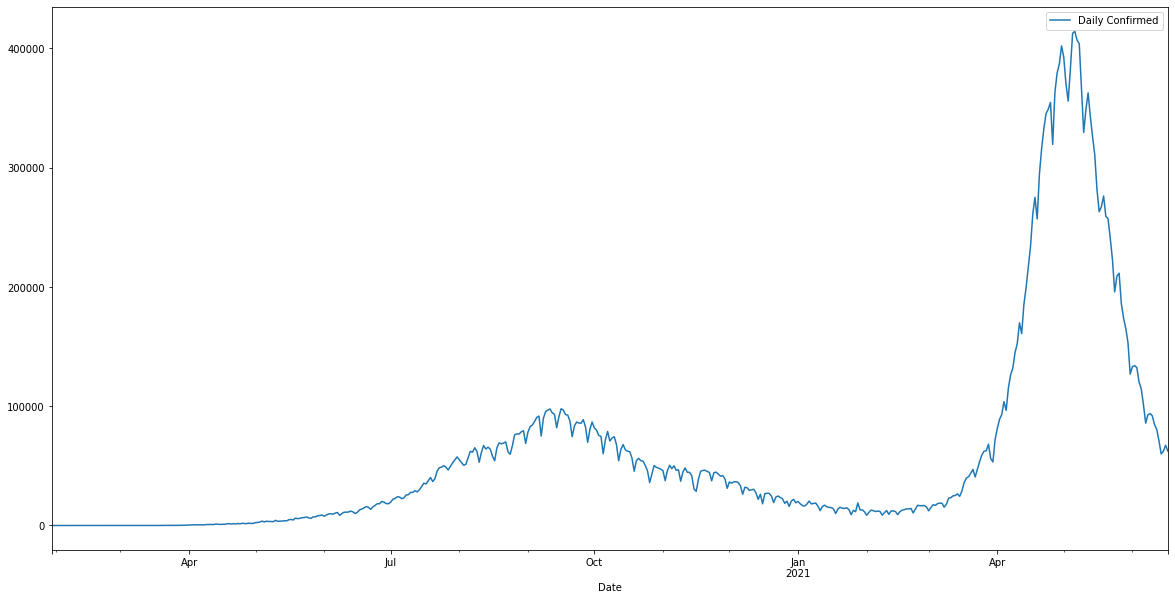

In [324]:
import matplotlib as plt
daily_covid.plot(figsize=(20,10))

Data Splitting


*   splitting the data in train test set
 
 



In [325]:
daily_covid.index

DatetimeIndex(['2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
               '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
               '2020-02-07', '2020-02-08',
               ...
               '2021-06-08', '2021-06-09', '2021-06-10', '2021-06-11',
               '2021-06-12', '2021-06-13', '2021-06-14', '2021-06-15',
               '2021-06-16', '2021-06-17'],
              dtype='datetime64[ns]', name='Date', length=505, freq='D')

In [326]:
cases = daily_covid["Daily Confirmed"].to_numpy()
timesteps = daily_covid.index.to_numpy() 
cases[:10], timesteps[:10]

(array([1, 0, 0, 1, 1, 0, 0, 0, 0, 0]),
 array(['2020-01-30T00:00:00.000000000', '2020-01-31T00:00:00.000000000',
        '2020-02-01T00:00:00.000000000', '2020-02-02T00:00:00.000000000',
        '2020-02-03T00:00:00.000000000', '2020-02-04T00:00:00.000000000',
        '2020-02-05T00:00:00.000000000', '2020-02-06T00:00:00.000000000',
        '2020-02-07T00:00:00.000000000', '2020-02-08T00:00:00.000000000'],
       dtype='datetime64[ns]'))

In [327]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(timesteps, cases,test_size = 0.2, random_state =42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((404,), (101,), (404,), (101,))

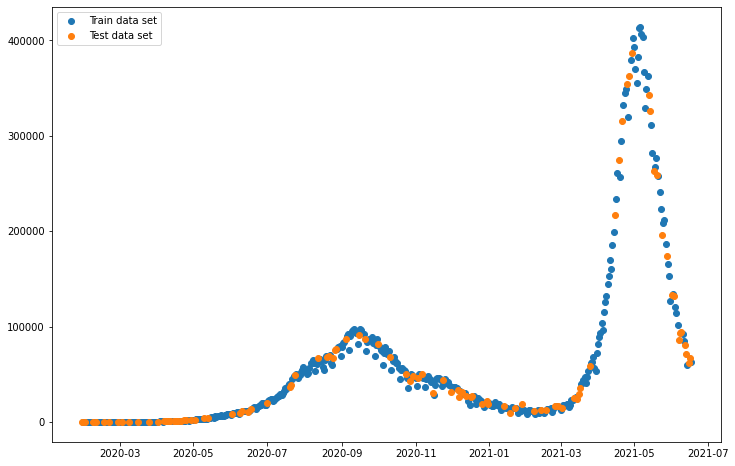

In [328]:
import matplotlib.pylab as plt
plt.figure(figsize=(12,8))
plt.scatter(x_train,y_train, label = "Train data set")
plt.scatter(x_test,y_test, label = "Test data set")
plt.legend()

In [329]:
split_size = int(0.80 * len(cases))
split_size

x_train, y_train = timesteps[:split_size], cases[:split_size]
x_test, y_test = timesteps[split_size:], cases[split_size:]

x_train.shape, x_test.shape, y_train.shape, y_test.shape


((404,), (101,), (404,), (101,))

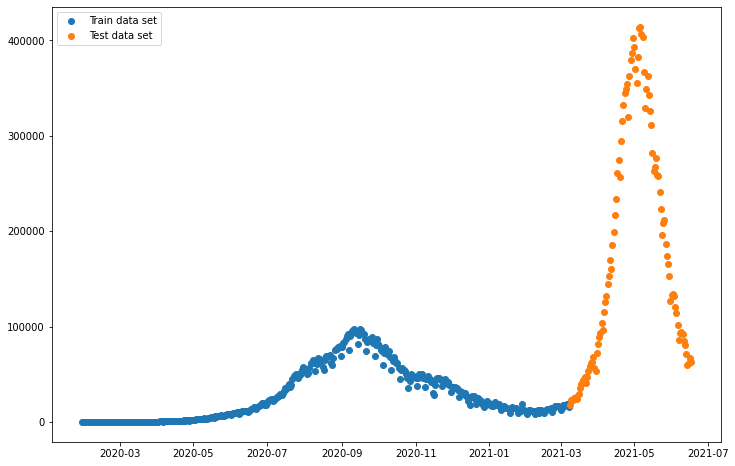

In [330]:
#plot
plt.figure(figsize=(12,8))
plt.scatter(x_train,y_train, label = "Train data set")
plt.scatter(x_test,y_test, label = "Test data set")
plt.legend()

# NAIVE MODEL
$$\hat{y}_{t} = y_{t-1}$$

In [331]:
naive_forecaset = y_test[:-1]
naive_forecaset[:10]

array([17873, 22851, 23298, 24845, 25154, 26513, 24437, 28869, 35838,
       39687])

In [332]:
y_test[1:]

array([ 22851,  23298,  24845,  25154,  26513,  24437,  28869,  35838,
        39687,  40906,  43815,  47009,  40636,  47239,  53419,  59083,
        62276,  62632,  68206,  56152,  53237,  72113,  81398,  89023,
        92994, 103794,  96563, 115312, 126276, 131878, 144945, 152565,
       169914, 160838, 185297, 199584, 216828, 234002, 260895, 275063,
       257003, 294365, 315752, 332531, 345296, 348996, 354658, 319471,
       362913, 379404, 386773, 402014, 392576, 370090, 355769, 382847,
       412624, 414280, 406901, 403808, 366455, 329491, 348555, 362632,
       343005, 326256, 310757, 281837, 263021, 267246, 276187, 259242,
       257299, 240897, 222834, 195857, 208992, 211510, 186075, 174083,
       165282, 153396, 126883, 133152, 134044, 132424, 120454, 114488,
       101209,  85804,  92787,  93883,  91849,  84574,  80525,  71001,
        60008,  62215,  67289,  62397])

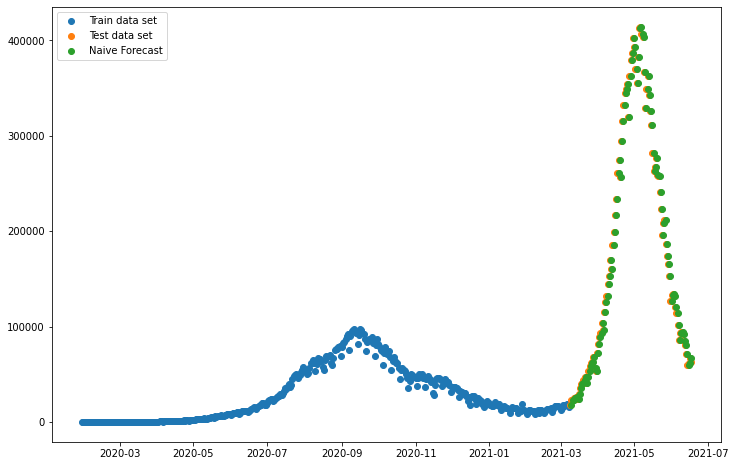

In [333]:
#plot navie forecast
plt.figure(figsize=(12,8))
plt.scatter(x_train,y_train, label = "Train data set")
plt.scatter(x_test,y_test, label = "Test data set")
plt.scatter(x_test[1:], naive_forecaset,label = "Naive Forecast")
plt.legend()

In [334]:
def plot_zoomed_in(new_preds = None,new_pred_name="new Pred" , zoomed_timesteps = 50):
  plt.figure(figsize=(12,8))
  plt.plot(x_test[-zoomed_timesteps:],y_test[-zoomed_timesteps:], label = "Test data set")
  plt.plot(x_test[1:][-zoomed_timesteps:], naive_forecaset[-zoomed_timesteps:],label = "Naive Forecast")
  if new_preds:
    plt.plot(x_test[-zoomed_timesteps:],new_preds[-zoomed_timesteps:], )
  plt.legend()
  plt.xlabel("Date")
  plt.ylabel("cases")
  plt.show()

In [335]:
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).
  
  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("cases")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

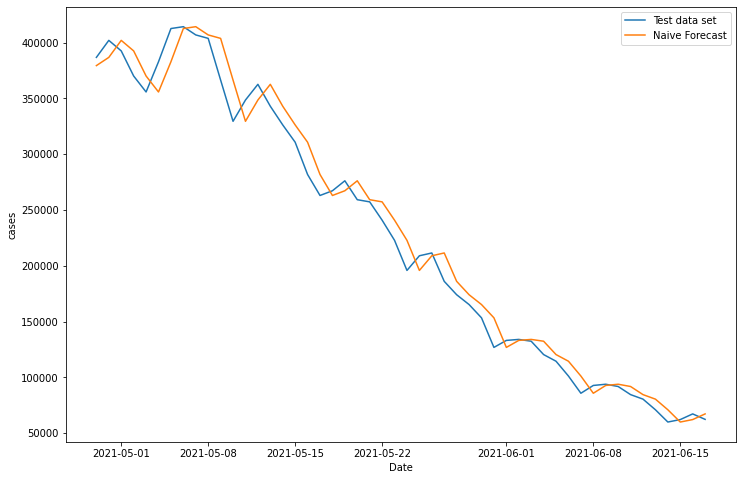

In [336]:
plot_zoomed_in()

In [337]:
#evaluation function
import tensorflow as tf
import numpy as np

In [338]:
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)

  return mae / mae_naive_no_season

In [339]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)
  
  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [340]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecaset)
naive_results

{'mae': 11956.86,
 'mape': 7.713236,
 'mase': 0.99413896,
 'mse': 234931340.0,
 'rmse': 15327.471}

In [341]:


evaluate_preds(y_true=y_test[1:],
                y_pred = naive_forecaset)

{'mae': 11956.86,
 'mape': 7.713236,
 'mase': 0.99413896,
 'mse': 234931340.0,
 'rmse': 15327.471}

In [342]:

tf.reduce_mean(y_test).numpy()


183338

In [343]:
window_size = 10
horizon = 1

In [344]:

def get_labelled_windows(x, horizon =1):
  return x[:,:-horizon], x[:, -horizon:]

In [345]:
# Test out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=horizon)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


In [346]:
# Create function to view NumPy arrays as windows 
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [347]:
full_windows, full_labels = make_windows(cases, window_size=window_size, horizon=horizon)
len(full_windows), len(full_labels)

(495, 495)

In [348]:
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [1 0 0 1 1 0 0 0 0 0] -> Label: [0]
Window: [0 0 1 1 0 0 0 0 0 0] -> Label: [0]
Window: [0 1 1 0 0 0 0 0 0 0] -> Label: [0]


In [349]:
# View the last 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [114488 101209  85804  92787  93883  91849  84574  80525  71001  60008] -> Label: [62215]
Window: [101209  85804  92787  93883  91849  84574  80525  71001  60008  62215] -> Label: [67289]
Window: [85804 92787 93883 91849 84574 80525 71001 60008 62215 67289] -> Label: [62397]


# Window in train and train


In [350]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [351]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(396, 99, 396, 99)

In [352]:
train_windows[:5], train_labels[:5]

(array([[1, 0, 0, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
        [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), array([[0],
        [0],
        [0],
        [0],
        [0]]))

In [353]:
np.array_equal(np.squeeze(train_labels[:-horizon-1]), y_train[window_size:])

True

In [354]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename 
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) # save only the best model to file

# MODEL 1 DENSE MODEL

In [355]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# Construct model
model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(horizon, activation="linear") # linear activation is the same as having no activation                        
], name="model_1_dense") # give the model a name so we can save it

# Compile model
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]) # we don't necessarily need this when the loss function is already MAE

# Fit model
model_1.fit(x=train_windows, # train windows of 7 timesteps of Bitcoin prices
            y=train_labels, # horizon value of 1 (using the previous 7 timesteps to predict next day)
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)]) # create ModelCheckpoint callback to save best model

Epoch 1/100
4/4 [==============================] - 1s 49ms/step - loss: 19389.3555 - mae: 19389.3555 - val_loss: 91549.5938 - val_mae: 91549.5938
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


Epoch 2/100
4/4 [==============================] - 0s 8ms/step - loss: 11788.2744 - mae: 11788.2744 - val_loss: 50480.3594 - val_mae: 50480.3594
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


Epoch 3/100
4/4 [==============================] - 0s 8ms/step - loss: 4809.5610 - mae: 4809.5610 - val_loss: 47053.8594 - val_mae: 47053.8594
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


Epoch 4/100
4/4 [==============================] - 0s 8ms/step - loss: 4646.3789 - mae: 4646.3789 - val_loss: 55016.6875 - val_mae: 55016.6875
Epoch 5/100
4/4 [==============================] - 0s 10ms/step - loss: 5680.8877 - mae: 5680.8877 - val_loss: 51009.6094 - val_mae: 51009.6094
Epoch 6/100
4/4 [==============================] - 0s 9ms/step - loss: 4375.7803 - mae: 4375.7803 - val_loss: 45729.9180 - val_mae: 45729.9180
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


Epoch 7/100
4/4 [==============================] - 0s 10ms/step - loss: 3550.5659 - mae: 3550.5659 - val_loss: 44442.8086 - val_mae: 44442.8086
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


Epoch 8/100
4/4 [==============================] - 0s 8ms/step - loss: 3529.8252 - mae: 3529.8252 - val_loss: 43296.5508 - val_mae: 43296.5508
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


Epoch 9/100
4/4 [==============================] - 0s 9ms/step - loss: 3501.8242 - mae: 3501.8242 - val_loss: 41471.0469 - val_mae: 41471.0469
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


Epoch 10/100
4/4 [==============================] - 0s 9ms/step - loss: 3147.1758 - mae: 3147.1758 - val_loss: 40266.8438 - val_mae: 40266.8438
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


Epoch 11/100
4/4 [==============================] - 0s 8ms/step - loss: 3171.8308 - mae: 3171.8308 - val_loss: 39149.2383 - val_mae: 39149.2383
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


Epoch 12/100
4/4 [==============================] - 0s 11ms/step - loss: 3054.1350 - mae: 3054.1350 - val_loss: 37588.3320 - val_mae: 37588.3320
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


Epoch 13/100
4/4 [==============================] - 0s 9ms/step - loss: 2888.5403 - mae: 2888.5403 - val_loss: 35727.1328 - val_mae: 35727.1328
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


Epoch 14/100
4/4 [==============================] - 0s 9ms/step - loss: 2777.3523 - mae: 2777.3523 - val_loss: 34033.6445 - val_mae: 34033.6445
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


Epoch 15/100
4/4 [==============================] - 0s 9ms/step - loss: 2686.9653 - mae: 2686.9653 - val_loss: 32727.3867 - val_mae: 32727.3867
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


Epoch 16/100
4/4 [==============================] - 0s 10ms/step - loss: 2617.8821 - mae: 2617.8821 - val_loss: 31694.0508 - val_mae: 31694.0508
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


Epoch 17/100
4/4 [==============================] - 0s 9ms/step - loss: 2596.4324 - mae: 2596.4324 - val_loss: 30151.6875 - val_mae: 30151.6875
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


Epoch 18/100
4/4 [==============================] - 0s 10ms/step - loss: 2521.5312 - mae: 2521.5312 - val_loss: 28870.7656 - val_mae: 28870.7656
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


Epoch 19/100
4/4 [==============================] - 0s 10ms/step - loss: 2482.1123 - mae: 2482.1123 - val_loss: 28282.5078 - val_mae: 28282.5078
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


Epoch 20/100
4/4 [==============================] - 0s 11ms/step - loss: 2411.5054 - mae: 2411.5054 - val_loss: 27888.2480 - val_mae: 27888.2480
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


Epoch 21/100
4/4 [==============================] - 0s 10ms/step - loss: 2340.1340 - mae: 2340.1340 - val_loss: 26023.1113 - val_mae: 26023.1113
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


Epoch 22/100
4/4 [==============================] - 0s 10ms/step - loss: 2301.5681 - mae: 2301.5681 - val_loss: 24743.0449 - val_mae: 24743.0449
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


Epoch 23/100
4/4 [==============================] - 0s 9ms/step - loss: 2228.1685 - mae: 2228.1685 - val_loss: 24588.5703 - val_mae: 24588.5703
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


Epoch 24/100
4/4 [==============================] - 0s 9ms/step - loss: 2174.5283 - mae: 2174.5283 - val_loss: 23545.1348 - val_mae: 23545.1348
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


Epoch 25/100
4/4 [==============================] - 0s 8ms/step - loss: 2130.1155 - mae: 2130.1155 - val_loss: 22908.5430 - val_mae: 22908.5430
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


Epoch 26/100
4/4 [==============================] - 0s 10ms/step - loss: 2122.1440 - mae: 2122.1440 - val_loss: 21571.6270 - val_mae: 21571.6270
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


Epoch 27/100
4/4 [==============================] - 0s 10ms/step - loss: 2124.8440 - mae: 2124.8440 - val_loss: 20276.1914 - val_mae: 20276.1914
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


Epoch 28/100
4/4 [==============================] - 0s 15ms/step - loss: 2135.5850 - mae: 2135.5850 - val_loss: 20163.9375 - val_mae: 20163.9375
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


Epoch 29/100
4/4 [==============================] - 0s 9ms/step - loss: 2014.0895 - mae: 2014.0895 - val_loss: 19580.9023 - val_mae: 19580.9023
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


Epoch 30/100
4/4 [==============================] - 0s 10ms/step - loss: 1971.2057 - mae: 1971.2057 - val_loss: 17846.5723 - val_mae: 17846.5723
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


Epoch 31/100
4/4 [==============================] - 0s 16ms/step - loss: 2177.2915 - mae: 2177.2915 - val_loss: 17994.1016 - val_mae: 17994.1016
Epoch 32/100
4/4 [==============================] - 0s 9ms/step - loss: 2074.1021 - mae: 2074.1021 - val_loss: 19448.5156 - val_mae: 19448.5156
Epoch 33/100
4/4 [==============================] - 0s 9ms/step - loss: 2025.3099 - mae: 2025.3099 - val_loss: 16465.7988 - val_mae: 16465.7988
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


Epoch 34/100
4/4 [==============================] - 0s 8ms/step - loss: 2006.0134 - mae: 2006.0134 - val_loss: 16728.2090 - val_mae: 16728.2090
Epoch 35/100
4/4 [==============================] - 0s 9ms/step - loss: 1912.6907 - mae: 1912.6907 - val_loss: 18062.1387 - val_mae: 18062.1387
Epoch 36/100
4/4 [==============================] - 0s 9ms/step - loss: 1962.4441 - mae: 1962.4441 - val_loss: 15984.1250 - val_mae: 15984.1250
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


Epoch 37/100
4/4 [==============================] - 0s 10ms/step - loss: 1910.6166 - mae: 1910.6166 - val_loss: 15443.8291 - val_mae: 15443.8291
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


Epoch 38/100
4/4 [==============================] - 0s 9ms/step - loss: 1904.0642 - mae: 1904.0642 - val_loss: 15677.9326 - val_mae: 15677.9326
Epoch 39/100
4/4 [==============================] - 0s 9ms/step - loss: 1841.7231 - mae: 1841.7231 - val_loss: 15331.6328 - val_mae: 15331.6328
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


Epoch 40/100
4/4 [==============================] - 0s 10ms/step - loss: 1823.4626 - mae: 1823.4626 - val_loss: 14860.5957 - val_mae: 14860.5957
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


Epoch 41/100
4/4 [==============================] - 0s 10ms/step - loss: 1852.1281 - mae: 1852.1281 - val_loss: 14290.2041 - val_mae: 14290.2041
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


Epoch 42/100
4/4 [==============================] - 0s 10ms/step - loss: 1779.2732 - mae: 1779.2732 - val_loss: 16945.3379 - val_mae: 16945.3379
Epoch 43/100
4/4 [==============================] - 0s 12ms/step - loss: 2056.4592 - mae: 2056.4592 - val_loss: 13947.1543 - val_mae: 13947.1543
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


Epoch 44/100
4/4 [==============================] - 0s 9ms/step - loss: 1949.7727 - mae: 1949.7727 - val_loss: 13286.2891 - val_mae: 13286.2891
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


Epoch 45/100
4/4 [==============================] - 0s 10ms/step - loss: 1826.0378 - mae: 1826.0378 - val_loss: 16577.4160 - val_mae: 16577.4160
Epoch 46/100
4/4 [==============================] - 0s 9ms/step - loss: 1926.3120 - mae: 1926.3120 - val_loss: 13313.6562 - val_mae: 13313.6562
Epoch 47/100
4/4 [==============================] - 0s 12ms/step - loss: 2009.9878 - mae: 2009.9878 - val_loss: 13200.1475 - val_mae: 13200.1475
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


Epoch 48/100
4/4 [==============================] - 0s 9ms/step - loss: 1770.5497 - mae: 1770.5497 - val_loss: 16334.9268 - val_mae: 16334.9268
Epoch 49/100
4/4 [==============================] - 0s 9ms/step - loss: 1847.7629 - mae: 1847.7629 - val_loss: 13190.2578 - val_mae: 13190.2578
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


Epoch 50/100
4/4 [==============================] - 0s 11ms/step - loss: 1817.5568 - mae: 1817.5568 - val_loss: 13501.7236 - val_mae: 13501.7236
Epoch 51/100
4/4 [==============================] - 0s 8ms/step - loss: 1754.3071 - mae: 1754.3071 - val_loss: 15139.5938 - val_mae: 15139.5938
Epoch 52/100
4/4 [==============================] - 0s 10ms/step - loss: 1693.3513 - mae: 1693.3513 - val_loss: 12792.0488 - val_mae: 12792.0488
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


Epoch 53/100
4/4 [==============================] - 0s 10ms/step - loss: 1881.7858 - mae: 1881.7858 - val_loss: 13468.1846 - val_mae: 13468.1846
Epoch 54/100
4/4 [==============================] - 0s 11ms/step - loss: 1725.8743 - mae: 1725.8743 - val_loss: 13890.3584 - val_mae: 13890.3584
Epoch 55/100
4/4 [==============================] - 0s 11ms/step - loss: 1723.1019 - mae: 1723.1019 - val_loss: 12895.3633 - val_mae: 12895.3633
Epoch 56/100
4/4 [==============================] - 0s 12ms/step - loss: 1705.8788 - mae: 1705.8788 - val_loss: 12491.0859 - val_mae: 12491.0859
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


Epoch 57/100
4/4 [==============================] - 0s 11ms/step - loss: 1731.9554 - mae: 1731.9554 - val_loss: 13674.9531 - val_mae: 13674.9531
Epoch 58/100
4/4 [==============================] - 0s 11ms/step - loss: 1731.5137 - mae: 1731.5137 - val_loss: 11802.4697 - val_mae: 11802.4697
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


Epoch 59/100
4/4 [==============================] - 0s 9ms/step - loss: 1747.4269 - mae: 1747.4269 - val_loss: 11789.6895 - val_mae: 11789.6895
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


Epoch 60/100
4/4 [==============================] - 0s 10ms/step - loss: 1750.1726 - mae: 1750.1726 - val_loss: 13600.5166 - val_mae: 13600.5166
Epoch 61/100
4/4 [==============================] - 0s 11ms/step - loss: 1696.5977 - mae: 1696.5977 - val_loss: 11143.3457 - val_mae: 11143.3457
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


Epoch 62/100
4/4 [==============================] - 0s 9ms/step - loss: 1681.5093 - mae: 1681.5093 - val_loss: 12282.5576 - val_mae: 12282.5576
Epoch 63/100
4/4 [==============================] - 0s 10ms/step - loss: 1684.4907 - mae: 1684.4907 - val_loss: 11914.0264 - val_mae: 11914.0264
Epoch 64/100
4/4 [==============================] - 0s 9ms/step - loss: 1649.7200 - mae: 1649.7200 - val_loss: 11100.9395 - val_mae: 11100.9395
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


Epoch 65/100
4/4 [==============================] - 0s 9ms/step - loss: 1651.5358 - mae: 1651.5358 - val_loss: 11362.4355 - val_mae: 11362.4355
Epoch 66/100
4/4 [==============================] - 0s 10ms/step - loss: 1656.9801 - mae: 1656.9801 - val_loss: 11915.3906 - val_mae: 11915.3906
Epoch 67/100
4/4 [==============================] - 0s 11ms/step - loss: 1655.3442 - mae: 1655.3442 - val_loss: 11085.9131 - val_mae: 11085.9131
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


Epoch 68/100
4/4 [==============================] - 0s 10ms/step - loss: 1601.0527 - mae: 1601.0527 - val_loss: 12691.2803 - val_mae: 12691.2803
Epoch 69/100
4/4 [==============================] - 0s 11ms/step - loss: 1640.4429 - mae: 1640.4429 - val_loss: 11441.0479 - val_mae: 11441.0479
Epoch 70/100
4/4 [==============================] - 0s 13ms/step - loss: 1629.5742 - mae: 1629.5742 - val_loss: 11224.9316 - val_mae: 11224.9316
Epoch 71/100
4/4 [==============================] - 0s 9ms/step - loss: 1639.4683 - mae: 1639.4683 - val_loss: 10224.4521 - val_mae: 10224.4521
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


Epoch 72/100
4/4 [==============================] - 0s 9ms/step - loss: 1603.8832 - mae: 1603.8832 - val_loss: 12317.7627 - val_mae: 12317.7627
Epoch 73/100
4/4 [==============================] - 0s 9ms/step - loss: 1654.1173 - mae: 1654.1173 - val_loss: 9653.5264 - val_mae: 9653.5264
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


Epoch 74/100
4/4 [==============================] - 0s 10ms/step - loss: 2026.7291 - mae: 2026.7291 - val_loss: 10947.4434 - val_mae: 10947.4434
Epoch 75/100
4/4 [==============================] - 0s 10ms/step - loss: 2010.9304 - mae: 2010.9304 - val_loss: 12934.0723 - val_mae: 12934.0723
Epoch 76/100
4/4 [==============================] - 0s 10ms/step - loss: 1806.2445 - mae: 1806.2445 - val_loss: 11913.1025 - val_mae: 11913.1025
Epoch 77/100
4/4 [==============================] - 0s 10ms/step - loss: 2097.9417 - mae: 2097.9417 - val_loss: 12078.2285 - val_mae: 12078.2285
Epoch 78/100
4/4 [==============================] - 0s 9ms/step - loss: 1780.9271 - mae: 1780.9271 - val_loss: 11285.0898 - val_mae: 11285.0898
Epoch 79/100
4/4 [==============================] - 0s 13ms/step - loss: 1749.1293 - mae: 1749.1293 - val_loss: 10059.6738 - val_mae: 10059.6738
Epoch 80/100
4/4 [==============================] - 0s 15ms/step - loss: 1674.4725 - mae: 1674.4725 - val_loss: 12772.6328 - val_ma

INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


Epoch 90/100
4/4 [==============================] - 0s 10ms/step - loss: 1541.9417 - mae: 1541.9417 - val_loss: 11961.1348 - val_mae: 11961.1348
Epoch 91/100
4/4 [==============================] - 0s 11ms/step - loss: 1690.7117 - mae: 1690.7117 - val_loss: 11415.3115 - val_mae: 11415.3115
Epoch 92/100
4/4 [==============================] - 0s 13ms/step - loss: 1564.0900 - mae: 1564.0900 - val_loss: 9768.9287 - val_mae: 9768.9287
Epoch 93/100
4/4 [==============================] - 0s 10ms/step - loss: 1552.9493 - mae: 1552.9493 - val_loss: 11071.4395 - val_mae: 11071.4395
Epoch 94/100
4/4 [==============================] - 0s 14ms/step - loss: 1625.7958 - mae: 1625.7958 - val_loss: 10490.8291 - val_mae: 10490.8291
Epoch 95/100
4/4 [==============================] - 0s 9ms/step - loss: 1588.8815 - mae: 1588.8815 - val_loss: 10135.9873 - val_mae: 10135.9873
Epoch 96/100
4/4 [==============================] - 0s 10ms/step - loss: 1569.8916 - mae: 1569.8916 - val_loss: 10792.0908 - val_mae:

INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


Epoch 98/100
4/4 [==============================] - 0s 10ms/step - loss: 1565.5233 - mae: 1565.5233 - val_loss: 10335.3828 - val_mae: 10335.3828
Epoch 99/100
4/4 [==============================] - 0s 10ms/step - loss: 1512.5000 - mae: 1512.5000 - val_loss: 8967.7656 - val_mae: 8967.7656
Epoch 100/100
4/4 [==============================] - 0s 11ms/step - loss: 1686.8643 - mae: 1686.8643 - val_loss: 12360.2119 - val_mae: 12360.2119


In [356]:
# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

4/4 [==============================] - 0s 3ms/step - loss: 12360.2119 - mae: 12360.2119


[12360.2119140625, 12360.2119140625]

In [357]:
# Load in saved best performing model_1 and evaluate on test data
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense")
model_1.evaluate(test_windows, test_labels)

4/4 [==============================] - 0s 3ms/step - loss: 8793.7969 - mae: 8793.7969


[8793.796875, 8793.796875]

In [358]:


def make_preds(model, input_data):
  """
  Uses model to make predictions on input_data.

  Parameters
  ----------
  model: trained model 
  input_data: windowed input data (same kind of data model was trained on)

  Returns model predictions on input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [359]:
# Make predictions using model_1 on the test dataset and view the results
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

(99, <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([21540.312, 22276.885, 24074.572, 23640.762, 23777.678, 25181.717,
        30278.2  , 34388.87 , 36864.74 , 39033.426], dtype=float32)>)

In [360]:
# Evaluate preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels), # reduce to right shape
                                 y_pred=model_1_preds)
model_1_results

{'mae': 8793.797,
 'mape': 6.1267757,
 'mase': 0.7240362,
 'mse': 137035900.0,
 'rmse': 11706.233}

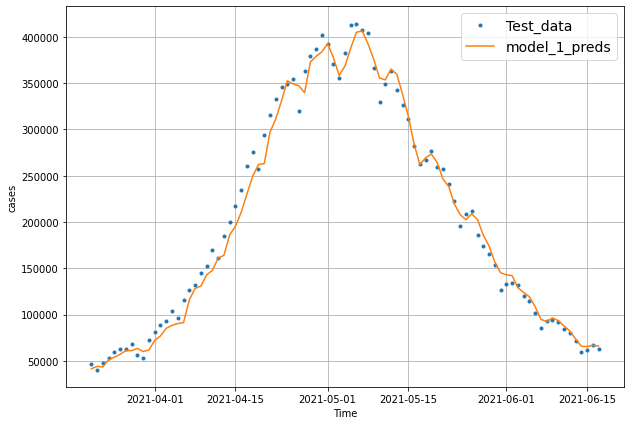

In [361]:
offset = 10
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=x_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=x_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="model_1_preds")

# MODEL 2: Dense(WINDOW 30, HORIZON 1)

In [362]:
HORIZON = 1 # predict one step at a time
WINDOW_SIZE = 30 # use 30 timesteps in the past

In [363]:
full_windows, full_labels = make_windows(cases, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(475, 475)

In [364]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(380, 95, 380, 95)

In [365]:
tf.random.set_seed(42)

# Create model (same model as model 1 but data input will be different)
model_2 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON) # need to predict horizon number of steps into the future
], name="model_2_dense")

model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets


In [366]:
# Evaluate model 2 preds
model_2.evaluate(test_windows, test_labels)

3/3 [==============================] - 0s 3ms/step - loss: 28936.7051


28936.705078125

In [367]:
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2.evaluate(test_windows, test_labels)

3/3 [==============================] - 0s 4ms/step - loss: 14493.7832


14493.783203125

In [368]:
# Get forecast predictions
model_2_preds = make_preds(model_2,
                           input_data=test_windows)

In [369]:
#evaluate
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels), # remove 1 dimension of test labels
                                 y_pred=model_2_preds)
model_2_results

{'mae': 14493.783,
 'mape': 10.438273,
 'mase': 1.149747,
 'mse': 329370270.0,
 'rmse': 18148.56}

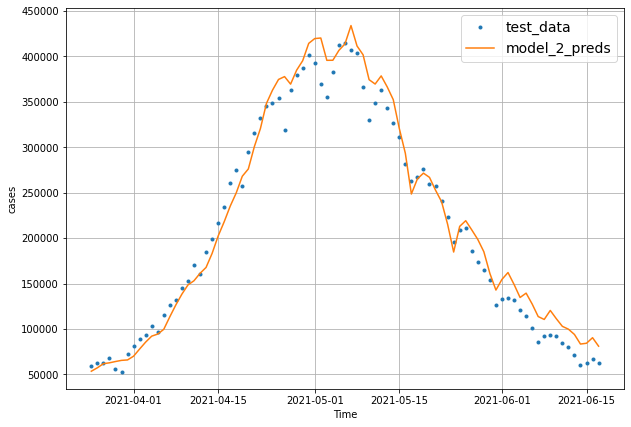

In [370]:
offset = 10
plt.figure(figsize=(10, 7))
# Account for the test_window offset
plot_time_series(timesteps=x_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="test_data")
plot_time_series(timesteps=x_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="model_2_preds")


#MODEL 3: WINDOW 30 HORIZON 7


In [371]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(cases, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(469, 469)

In [372]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels, test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(375, 94, 375, 94)

In [373]:
model_3 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_3_dense")

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


In [374]:
model_3.evaluate(test_windows, test_labels)

3/3 [==============================] - 0s 3ms/step - loss: 34761.3164


34761.31640625

In [375]:
model_3_preds = make_preds(model_3,
                           input_data=test_windows)
model_3_preds[:5]

<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[19227.854, 18592.398, 19693.172, 19749.746, 18921.03 , 17702.21 ,
        18718.371],
       [20208.303, 19554.285, 20530.793, 19884.834, 18474.926, 20129.057,
        21811.86 ],
       [22403.307, 21987.902, 20487.406, 19685.492, 22421.21 , 24027.152,
        23949.826],
       [24483.15 , 22889.17 , 20864.91 , 23431.941, 27126.047, 26261.63 ,
        27174.805],
       [23269.592, 22218.332, 22176.227, 26213.668, 26246.797, 26461.229,
        26720.232]], dtype=float32)>

In [376]:
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': array([ 6194.6025,  6908.5635,  7197.243 ,  7024.6206,  9536.989 ,
        10452.294 , 11198.476 , 11904.432 , 10582.107 ,  9298.123 ,
         8802.674 ,  7812.518 ,  6925.733 ,  7227.068 ,  6488.4336,
         5500.9097,  6587.4805,  6697.2446,  8256.406 , 10295.42  ,
        12944.188 , 20034.83  , 22159.959 , 23419.705 , 23878.004 ,
        26590.33  , 25631.826 , 29566.041 , 25975.666 , 26769.15  ,
        32063.998 , 29963.088 , 33402.555 , 33373.254 , 39680.938 ,
        39213.457 , 42368.586 , 44468.168 , 38270.99  , 28591.686 ,
        20903.521 , 24105.166 , 16632.375 , 17163.312 , 21861.691 ,
        33619.16  , 37275.492 , 50568.402 , 40712.883 , 56241.887 ,
        57160.637 , 56559.27  , 67830.27  , 65208.508 , 62990.03  ,
        55798.023 , 60867.09  , 68323.766 , 80159.15  , 93049.266 ,
        96433.734 , 96049.75  , 76852.516 , 69411.51  , 70192.8   ,
        59750.855 , 53421.02  , 40004.98  , 25045.996 , 22907.975 ,
        12976.556 , 13981.728 , 11522.511

In [377]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, reduce to single number)
  if mae.ndim > 0: # if mae isn't already a scalar, reduce it to one by aggregating tensors to mean
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [378]:
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 34761.316,
 'mape': 21.851511,
 'mase': 2.7627358,
 'mse': 2006115800.0,
 'rmse': 37736.74}

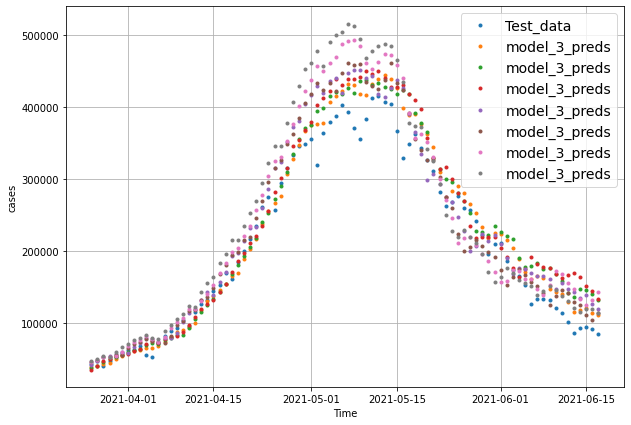

In [379]:
offset = 10
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=x_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
# Checking the shape of model_3_preds results in [n_test_samples, HORIZON] (this will screw up the plot)
plot_time_series(timesteps=x_test[-len(test_windows):], values=model_3_preds, start=offset, label="model_3_preds")

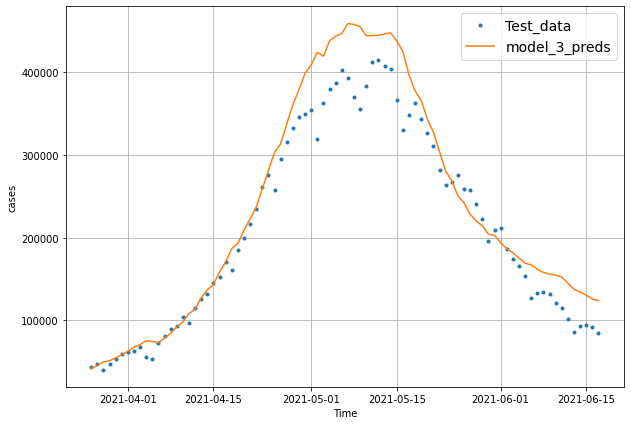

In [380]:
offset = 10
plt.figure(figsize=(10, 7))
# Plot model_3_preds by aggregating them (note: this condenses information so the preds will look fruther ahead than the test data)
plot_time_series(timesteps=x_test[-len(test_windows):], 
                 values=test_labels[:, 0], 
                 start=offset, 
                 label="Test_data")
plot_time_series(timesteps=x_test[-len(test_windows):], 
                 values=tf.reduce_mean(model_3_preds, axis=1), 
                 format="-",
                 start=offset, 
                 label="model_3_preds")

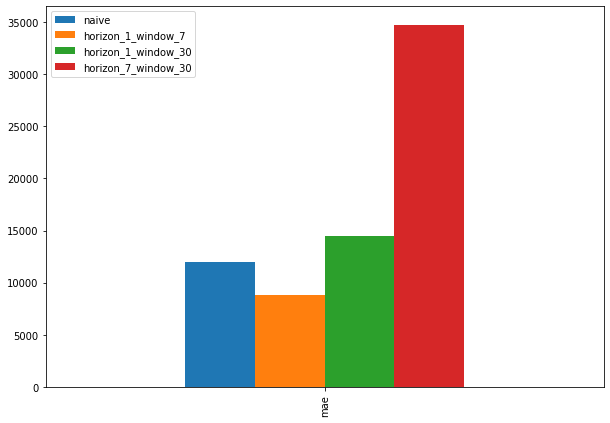

In [381]:
pd.DataFrame({"naive": naive_results["mae"], 
              "horizon_1_window_7": model_1_results["mae"], 
              "horizon_1_window_30": model_2_results["mae"], 
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");

# MODEL 4: Conv1D


In [382]:
HORIZON = 1 # predict next day
WINDOW_SIZE = 7 # use previous week worth of data

In [383]:
# Create windowed dataset
full_windows, full_labels = make_windows(cases, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(498, 498)

In [384]:
# Create train/test splits
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(398, 100, 398, 100)

In [385]:
train_windows = tf.cast(train_windows,tf.float32)

In [386]:
#Note: change shape 
train_windows[0].shape

TensorShape([7])

In [387]:
x = tf.constant(train_windows[0])
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add an extra dimension for timesteps
print(f"Original shape: {x.shape}") # (WINDOW_SIZE)
print(f"Expanded shape: {expand_dims_layer(x).shape}") # (WINDOW_SIZE, input_dim) 
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")


Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]]


In [388]:
# Create model
model_4 = tf.keras.Sequential([
  # Create Lambda layer to reshape inputs, without this layer, the model will error
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)), # resize the inputs to adjust for window size / Conv1D 3D input requirements
  layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu"),
  layers.Dense(HORIZON)
], name="model_4_conv1D")

# Compile model
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_4.fit(x=train_windows, # train windows of 7 timesteps of Bitcoin prices
            y=train_labels, # horizon value of 1 (using the previous 7 timesteps to predict next day)
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

Epoch 1/100
4/4 [==============================] - 1s 57ms/step - loss: 24802.4375 - val_loss: 130041.4062
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets


Epoch 2/100
4/4 [==============================] - 0s 9ms/step - loss: 18121.2363 - val_loss: 86368.5469
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets


Epoch 3/100
4/4 [==============================] - 0s 11ms/step - loss: 11387.6660 - val_loss: 43467.5859
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets


Epoch 4/100
4/4 [==============================] - 0s 10ms/step - loss: 5190.8130 - val_loss: 28481.5605
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets


Epoch 5/100
4/4 [==============================] - 0s 9ms/step - loss: 2964.5515 - val_loss: 37064.0273
Epoch 6/100
4/4 [==============================] - 0s 8ms/step - loss: 4616.4629 - val_loss: 35679.0117
Epoch 7/100
4/4 [==============================] - 0s 10ms/step - loss: 3681.6948 - val_loss: 29353.1602
Epoch 8/100
4/4 [==============================] - 0s 9ms/step - loss: 2556.8997 - val_loss: 27812.9258
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets


Epoch 9/100
4/4 [==============================] - 0s 9ms/step - loss: 2809.7554 - val_loss: 27970.6992
Epoch 10/100
4/4 [==============================] - 0s 10ms/step - loss: 2898.0715 - val_loss: 27863.1895
Epoch 11/100
4/4 [==============================] - 0s 8ms/step - loss: 2518.9866 - val_loss: 28479.8242
Epoch 12/100
4/4 [==============================] - 0s 9ms/step - loss: 2543.3457 - val_loss: 29276.9824
Epoch 13/100
4/4 [==============================] - 0s 11ms/step - loss: 2579.8474 - val_loss: 28093.5059
Epoch 14/100
4/4 [==============================] - 0s 11ms/step - loss: 2462.6602 - val_loss: 27285.4941
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets


Epoch 15/100
4/4 [==============================] - 0s 9ms/step - loss: 2498.9341 - val_loss: 27248.5195
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets


Epoch 16/100
4/4 [==============================] - 0s 8ms/step - loss: 2465.5645 - val_loss: 27266.1191
Epoch 17/100
4/4 [==============================] - 0s 9ms/step - loss: 2424.8606 - val_loss: 27376.2129
Epoch 18/100
4/4 [==============================] - 0s 9ms/step - loss: 2430.6702 - val_loss: 27621.5391
Epoch 19/100
4/4 [==============================] - 0s 8ms/step - loss: 2456.3472 - val_loss: 27328.3809
Epoch 20/100
4/4 [==============================] - 0s 9ms/step - loss: 2442.4216 - val_loss: 26701.5645
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets


Epoch 21/100
4/4 [==============================] - 0s 11ms/step - loss: 2414.9189 - val_loss: 26559.9629
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets


Epoch 22/100
4/4 [==============================] - 0s 9ms/step - loss: 2381.9526 - val_loss: 26815.7930
Epoch 23/100
4/4 [==============================] - 0s 9ms/step - loss: 2425.7441 - val_loss: 27332.0781
Epoch 24/100
4/4 [==============================] - 0s 10ms/step - loss: 2456.9287 - val_loss: 26678.7676
Epoch 25/100
4/4 [==============================] - 0s 9ms/step - loss: 2405.2991 - val_loss: 26101.1855
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets


Epoch 26/100
4/4 [==============================] - 0s 9ms/step - loss: 2392.3972 - val_loss: 26052.6621
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets


Epoch 27/100
4/4 [==============================] - 0s 8ms/step - loss: 2378.2261 - val_loss: 26067.7207
Epoch 28/100
4/4 [==============================] - 0s 11ms/step - loss: 2363.1763 - val_loss: 26016.1543
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets


Epoch 29/100
4/4 [==============================] - 0s 8ms/step - loss: 2356.7822 - val_loss: 26057.5859
Epoch 30/100
4/4 [==============================] - 0s 9ms/step - loss: 2365.7507 - val_loss: 25700.2578
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets


Epoch 31/100
4/4 [==============================] - 0s 9ms/step - loss: 2342.1555 - val_loss: 25512.6875
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets


Epoch 32/100
4/4 [==============================] - 0s 10ms/step - loss: 2321.1526 - val_loss: 25122.3730
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets


Epoch 33/100
4/4 [==============================] - 0s 9ms/step - loss: 2322.6689 - val_loss: 25048.5391
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets


Epoch 34/100
4/4 [==============================] - 0s 9ms/step - loss: 2313.9802 - val_loss: 24739.3301
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets


Epoch 35/100
4/4 [==============================] - 0s 9ms/step - loss: 2386.9990 - val_loss: 24574.9277
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets


Epoch 36/100
4/4 [==============================] - 0s 9ms/step - loss: 2322.6455 - val_loss: 25272.0801
Epoch 37/100
4/4 [==============================] - 0s 9ms/step - loss: 2351.1970 - val_loss: 25016.2324
Epoch 38/100
4/4 [==============================] - 0s 9ms/step - loss: 2329.9695 - val_loss: 24429.2207
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets


Epoch 39/100
4/4 [==============================] - 0s 10ms/step - loss: 2296.6560 - val_loss: 24605.6426
Epoch 40/100
4/4 [==============================] - 0s 10ms/step - loss: 2294.5295 - val_loss: 24476.9922
Epoch 41/100
4/4 [==============================] - 0s 9ms/step - loss: 2295.8269 - val_loss: 24138.1484
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets


Epoch 42/100
4/4 [==============================] - 0s 10ms/step - loss: 2292.8867 - val_loss: 24213.4746
Epoch 43/100
4/4 [==============================] - 0s 9ms/step - loss: 2294.6582 - val_loss: 24019.4668
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets


Epoch 44/100
4/4 [==============================] - 0s 9ms/step - loss: 2294.3325 - val_loss: 23032.5254
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets


Epoch 45/100
4/4 [==============================] - 0s 9ms/step - loss: 2273.0762 - val_loss: 23512.5703
Epoch 46/100
4/4 [==============================] - 0s 11ms/step - loss: 2265.4565 - val_loss: 23486.9902
Epoch 47/100
4/4 [==============================] - 0s 9ms/step - loss: 2263.2202 - val_loss: 22638.3359
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets


Epoch 48/100
4/4 [==============================] - 0s 9ms/step - loss: 2310.6763 - val_loss: 22652.9258
Epoch 49/100
4/4 [==============================] - 0s 9ms/step - loss: 2258.5662 - val_loss: 22867.2969
Epoch 50/100
4/4 [==============================] - 0s 9ms/step - loss: 2231.5056 - val_loss: 22788.2305
Epoch 51/100
4/4 [==============================] - 0s 10ms/step - loss: 2227.4778 - val_loss: 22346.0059
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets


Epoch 52/100
4/4 [==============================] - 0s 11ms/step - loss: 2330.7666 - val_loss: 22310.7480
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets


Epoch 53/100
4/4 [==============================] - 0s 8ms/step - loss: 2239.4153 - val_loss: 23287.5527
Epoch 54/100
4/4 [==============================] - 0s 9ms/step - loss: 2352.3352 - val_loss: 24268.4609
Epoch 55/100
4/4 [==============================] - 0s 10ms/step - loss: 2351.2173 - val_loss: 22746.6953
Epoch 56/100
4/4 [==============================] - 0s 9ms/step - loss: 2220.8137 - val_loss: 21995.3047
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets


Epoch 57/100
4/4 [==============================] - 0s 9ms/step - loss: 2286.8694 - val_loss: 22109.8477
Epoch 58/100
4/4 [==============================] - 0s 12ms/step - loss: 2200.8545 - val_loss: 22848.2617
Epoch 59/100
4/4 [==============================] - 0s 10ms/step - loss: 2266.4475 - val_loss: 22934.5391
Epoch 60/100
4/4 [==============================] - 0s 11ms/step - loss: 2228.3945 - val_loss: 21988.7031
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets


Epoch 61/100
4/4 [==============================] - 0s 9ms/step - loss: 2198.7649 - val_loss: 22048.3242
Epoch 62/100
4/4 [==============================] - 0s 9ms/step - loss: 2199.9463 - val_loss: 21925.9707
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets


Epoch 63/100
4/4 [==============================] - 0s 11ms/step - loss: 2195.2036 - val_loss: 21956.7344
Epoch 64/100
4/4 [==============================] - 0s 10ms/step - loss: 2214.7446 - val_loss: 21741.7422
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets


Epoch 65/100
4/4 [==============================] - 0s 9ms/step - loss: 2175.2168 - val_loss: 23108.6719
Epoch 66/100
4/4 [==============================] - 0s 9ms/step - loss: 2337.5815 - val_loss: 23303.7031
Epoch 67/100
4/4 [==============================] - 0s 8ms/step - loss: 2249.2349 - val_loss: 21672.3047
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets


Epoch 68/100
4/4 [==============================] - 0s 9ms/step - loss: 2178.8115 - val_loss: 21362.0703
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets


Epoch 69/100
4/4 [==============================] - 0s 11ms/step - loss: 2209.3003 - val_loss: 21457.1172
Epoch 70/100
4/4 [==============================] - 0s 12ms/step - loss: 2174.4441 - val_loss: 21626.6406
Epoch 71/100
4/4 [==============================] - 0s 11ms/step - loss: 2165.4326 - val_loss: 21168.1895
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets


Epoch 72/100
4/4 [==============================] - 0s 9ms/step - loss: 2182.9653 - val_loss: 21042.7480
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets


Epoch 73/100
4/4 [==============================] - 0s 9ms/step - loss: 2176.9121 - val_loss: 21541.0117
Epoch 74/100
4/4 [==============================] - 0s 9ms/step - loss: 2163.8228 - val_loss: 21927.3301
Epoch 75/100
4/4 [==============================] - 0s 9ms/step - loss: 2235.6548 - val_loss: 22283.1680
Epoch 76/100
4/4 [==============================] - 0s 9ms/step - loss: 2236.8184 - val_loss: 21120.2969
Epoch 77/100
4/4 [==============================] - 0s 10ms/step - loss: 2154.5637 - val_loss: 21065.7676
Epoch 78/100
4/4 [==============================] - 0s 9ms/step - loss: 2182.5042 - val_loss: 21723.9766
Epoch 79/100
4/4 [==============================] - 0s 11ms/step - loss: 2207.5564 - val_loss: 20594.0820
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets


Epoch 80/100
4/4 [==============================] - 0s 9ms/step - loss: 2159.1953 - val_loss: 20379.5898
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets


Epoch 81/100
4/4 [==============================] - 0s 11ms/step - loss: 2149.4937 - val_loss: 20824.7617
Epoch 82/100
4/4 [==============================] - 0s 9ms/step - loss: 2152.6379 - val_loss: 20246.3027
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets


Epoch 83/100
4/4 [==============================] - 0s 9ms/step - loss: 2224.0430 - val_loss: 20026.2285
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets


Epoch 84/100
4/4 [==============================] - 0s 9ms/step - loss: 2176.5056 - val_loss: 21965.9316
Epoch 85/100
4/4 [==============================] - 0s 9ms/step - loss: 2313.8906 - val_loss: 21238.4375
Epoch 86/100
4/4 [==============================] - 0s 9ms/step - loss: 2151.7896 - val_loss: 19834.6914
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets


Epoch 87/100
4/4 [==============================] - 0s 10ms/step - loss: 2232.2205 - val_loss: 19880.4609
Epoch 88/100
4/4 [==============================] - 0s 9ms/step - loss: 2172.6763 - val_loss: 20667.2461
Epoch 89/100
4/4 [==============================] - 0s 10ms/step - loss: 2129.1033 - val_loss: 19933.3496
Epoch 90/100
4/4 [==============================] - 0s 10ms/step - loss: 2173.3213 - val_loss: 20063.9219
Epoch 91/100
4/4 [==============================] - 0s 9ms/step - loss: 2138.9187 - val_loss: 20967.1367
Epoch 92/100
4/4 [==============================] - 0s 10ms/step - loss: 2193.6763 - val_loss: 20844.3555
Epoch 93/100
4/4 [==============================] - 0s 10ms/step - loss: 2157.1160 - val_loss: 20263.8066
Epoch 94/100
4/4 [==============================] - 0s 9ms/step - loss: 2152.2458 - val_loss: 21130.8203
Epoch 95/100
4/4 [==============================] - 0s 9ms/step - loss: 2182.3899 - val_loss: 19995.4688
Epoch 96/100
4/4 [==============================] 

INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets


Epoch 97/100
4/4 [==============================] - 0s 11ms/step - loss: 2129.6504 - val_loss: 21079.2754
Epoch 98/100
4/4 [==============================] - 0s 9ms/step - loss: 2253.4089 - val_loss: 21017.8906
Epoch 99/100
4/4 [==============================] - 0s 9ms/step - loss: 2176.7441 - val_loss: 19635.4688
Epoch 100/100
4/4 [==============================] - 0s 9ms/step - loss: 2133.4170 - val_loss: 19608.9980


In [389]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_11 (Lambda)           (None, 1, 7)              0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 1, 128)            4608      
_________________________________________________________________
dense_203 (Dense)            (None, 1, 1)              129       
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [390]:
#eval
model_4 = tf.keras.models.load_model("model_experiments/model_4_conv1D")
model_4.evaluate(test_windows, test_labels)

4/4 [==============================] - 0s 3ms/step - loss: 19608.9785


19608.978515625

In [391]:
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17679.13 , 19933.445, 21028.197, 22597.295, 23005.928, 24082.846,
       23980.914, 26818.6  , 30424.164, 33736.59 ], dtype=float32)>

In [392]:
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 19608.98,
 'mape': 12.842509,
 'mase': 1.6303654,
 'mse': 563639700.0,
 'rmse': 23741.098}

# LSTM MODEL

In [393]:
tf.random.set_seed(42)

# Let's build an LSTM model with the Functional API
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs) # expand input dimension to be compatible with LSTM
# print(x.shape)
# x = layers.LSTM(128, activation="relu", return_sequences=True)(x) # this layer will error if the inputs are not the right shape
x = layers.LSTM(128, activation="relu")(x) # using the tanh loss function results in a massive error
# print(x.shape)
# Add another optional dense layer (you could add more of these to see if they improve model performance)
# x = layers.Dense(32, activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_lstm")

# Compile model
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Seems when saving the model several warnings are appearing: https://github.com/tensorflow/tensorflow/issues/47554 
model_5.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

Epoch 1/100
4/4 [==============================] - 1s 81ms/step - loss: 25845.3887 - val_loss: 154869.8438
INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


Epoch 2/100
4/4 [==============================] - 0s 11ms/step - loss: 23097.2031 - val_loss: 138383.4531
INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


Epoch 3/100
4/4 [==============================] - 0s 11ms/step - loss: 20647.6953 - val_loss: 122095.1875
INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


Epoch 4/100
4/4 [==============================] - 0s 12ms/step - loss: 17921.4609 - val_loss: 97616.5781
INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


Epoch 5/100
4/4 [==============================] - 0s 14ms/step - loss: 13581.0703 - val_loss: 65638.2031
INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


Epoch 6/100
4/4 [==============================] - 0s 12ms/step - loss: 8755.6943 - val_loss: 36652.7734
INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


Epoch 7/100
4/4 [==============================] - 0s 11ms/step - loss: 4090.1753 - val_loss: 30911.8691
INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


Epoch 8/100
4/4 [==============================] - 0s 12ms/step - loss: 3113.6675 - val_loss: 35790.6641
Epoch 9/100
4/4 [==============================] - 0s 12ms/step - loss: 4409.9160 - val_loss: 34255.6016
Epoch 10/100
4/4 [==============================] - 0s 11ms/step - loss: 3923.0537 - val_loss: 27943.9434
INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


Epoch 11/100
4/4 [==============================] - 0s 13ms/step - loss: 2857.4124 - val_loss: 24016.3379
INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


Epoch 12/100
4/4 [==============================] - 0s 12ms/step - loss: 2614.5210 - val_loss: 27121.4727
Epoch 13/100
4/4 [==============================] - 0s 11ms/step - loss: 2807.4814 - val_loss: 24496.2109
Epoch 14/100
4/4 [==============================] - 0s 12ms/step - loss: 2651.4146 - val_loss: 24207.3867
Epoch 15/100
4/4 [==============================] - 0s 12ms/step - loss: 2574.7573 - val_loss: 25978.7949
Epoch 16/100
4/4 [==============================] - 0s 12ms/step - loss: 2680.6265 - val_loss: 25816.1367
Epoch 17/100
4/4 [==============================] - 0s 11ms/step - loss: 2468.4570 - val_loss: 24842.3242
Epoch 18/100
4/4 [==============================] - 0s 13ms/step - loss: 2477.0227 - val_loss: 26335.6328
Epoch 19/100
4/4 [==============================] - 0s 12ms/step - loss: 2705.5500 - val_loss: 24595.6797
Epoch 20/100
4/4 [==============================] - 0s 13ms/step - loss: 2536.3523 - val_loss: 22857.5801
INFO:tensorflow:Assets written to: model_exper

INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


Epoch 21/100
4/4 [==============================] - 0s 11ms/step - loss: 2474.9238 - val_loss: 23006.7949
Epoch 22/100
4/4 [==============================] - 0s 11ms/step - loss: 2485.2256 - val_loss: 23902.8496
Epoch 23/100
4/4 [==============================] - 0s 12ms/step - loss: 2447.7637 - val_loss: 24662.9004
Epoch 24/100
4/4 [==============================] - 0s 16ms/step - loss: 2525.6509 - val_loss: 24461.1094
Epoch 25/100
4/4 [==============================] - 0s 13ms/step - loss: 2464.6663 - val_loss: 23729.0391
Epoch 26/100
4/4 [==============================] - 0s 12ms/step - loss: 2440.0183 - val_loss: 23460.3145
Epoch 27/100
4/4 [==============================] - 0s 12ms/step - loss: 2454.1802 - val_loss: 23470.0352
Epoch 28/100
4/4 [==============================] - 0s 13ms/step - loss: 2453.6553 - val_loss: 23475.6895
Epoch 29/100
4/4 [==============================] - 0s 13ms/step - loss: 2419.6440 - val_loss: 23539.1484
Epoch 30/100
4/4 [============================

INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


Epoch 34/100
4/4 [==============================] - 0s 13ms/step - loss: 2406.0090 - val_loss: 22377.9355
INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


Epoch 35/100
4/4 [==============================] - 0s 12ms/step - loss: 2373.3704 - val_loss: 22075.4453
INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


Epoch 36/100
4/4 [==============================] - 0s 11ms/step - loss: 2343.2405 - val_loss: 22544.7773
Epoch 37/100
4/4 [==============================] - 0s 11ms/step - loss: 2477.0896 - val_loss: 22891.4258
Epoch 38/100
4/4 [==============================] - 0s 11ms/step - loss: 2467.6860 - val_loss: 22770.9727
Epoch 39/100
4/4 [==============================] - 0s 11ms/step - loss: 2420.4841 - val_loss: 23160.1680
Epoch 40/100
4/4 [==============================] - 0s 12ms/step - loss: 2404.5300 - val_loss: 23106.1426
Epoch 41/100
4/4 [==============================] - 0s 11ms/step - loss: 2389.8401 - val_loss: 22128.7559
Epoch 42/100
4/4 [==============================] - 0s 12ms/step - loss: 2385.6895 - val_loss: 22048.2070
INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


Epoch 43/100
4/4 [==============================] - 0s 12ms/step - loss: 2342.2769 - val_loss: 22673.2559
Epoch 44/100
4/4 [==============================] - 0s 11ms/step - loss: 2365.6287 - val_loss: 21890.2480
INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


Epoch 45/100
4/4 [==============================] - 0s 15ms/step - loss: 2342.0430 - val_loss: 21816.0234
INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


Epoch 46/100
4/4 [==============================] - 0s 12ms/step - loss: 2332.1333 - val_loss: 21924.7656
Epoch 47/100
4/4 [==============================] - 0s 12ms/step - loss: 2333.9814 - val_loss: 21573.2148
INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


Epoch 48/100
4/4 [==============================] - 0s 12ms/step - loss: 2357.9297 - val_loss: 21452.1582
INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


Epoch 49/100
4/4 [==============================] - 0s 12ms/step - loss: 2346.6147 - val_loss: 21639.5547
Epoch 50/100
4/4 [==============================] - 0s 12ms/step - loss: 2310.8647 - val_loss: 21814.9355
Epoch 51/100
4/4 [==============================] - 0s 13ms/step - loss: 2317.7971 - val_loss: 21645.9746
Epoch 52/100
4/4 [==============================] - 0s 12ms/step - loss: 2324.3450 - val_loss: 21155.1074
INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


Epoch 53/100
4/4 [==============================] - 0s 11ms/step - loss: 2433.3796 - val_loss: 21363.7969
Epoch 54/100
4/4 [==============================] - 0s 13ms/step - loss: 2326.6824 - val_loss: 22628.4199
Epoch 55/100
4/4 [==============================] - 0s 13ms/step - loss: 2397.3997 - val_loss: 22485.8281
Epoch 56/100
4/4 [==============================] - 0s 12ms/step - loss: 2343.0217 - val_loss: 21508.5117
Epoch 57/100
4/4 [==============================] - 0s 12ms/step - loss: 2298.2349 - val_loss: 21152.5508
INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


Epoch 58/100
4/4 [==============================] - 0s 12ms/step - loss: 2309.7544 - val_loss: 21459.6621
Epoch 59/100
4/4 [==============================] - 0s 12ms/step - loss: 2309.2820 - val_loss: 22180.5469
Epoch 60/100
4/4 [==============================] - 0s 12ms/step - loss: 2332.8047 - val_loss: 21638.0078
Epoch 61/100
4/4 [==============================] - 0s 12ms/step - loss: 2293.8015 - val_loss: 21294.7402
Epoch 62/100
4/4 [==============================] - 0s 13ms/step - loss: 2276.7183 - val_loss: 21035.2891
INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


Epoch 63/100
4/4 [==============================] - 0s 13ms/step - loss: 2283.3662 - val_loss: 21336.7773
Epoch 64/100
4/4 [==============================] - 0s 14ms/step - loss: 2281.0903 - val_loss: 21181.0059
Epoch 65/100
4/4 [==============================] - 0s 11ms/step - loss: 2248.1877 - val_loss: 21900.2402
Epoch 66/100
4/4 [==============================] - 0s 12ms/step - loss: 2350.5813 - val_loss: 22077.2832
Epoch 67/100
4/4 [==============================] - 0s 13ms/step - loss: 2310.3977 - val_loss: 20937.6055
INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


Epoch 68/100
4/4 [==============================] - 0s 13ms/step - loss: 2249.0132 - val_loss: 20585.3398
INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


Epoch 69/100
4/4 [==============================] - 0s 11ms/step - loss: 2274.6609 - val_loss: 20148.3418
INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


Epoch 70/100
4/4 [==============================] - 0s 12ms/step - loss: 2256.4385 - val_loss: 20001.6992
INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


Epoch 71/100
4/4 [==============================] - 0s 12ms/step - loss: 2224.5442 - val_loss: 19303.1133
INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


Epoch 72/100
4/4 [==============================] - 0s 11ms/step - loss: 2217.3228 - val_loss: 19439.2578
Epoch 73/100
4/4 [==============================] - 0s 12ms/step - loss: 2269.9033 - val_loss: 20634.1758
Epoch 74/100
4/4 [==============================] - 0s 12ms/step - loss: 2293.4368 - val_loss: 20659.4355
Epoch 75/100
4/4 [==============================] - 0s 11ms/step - loss: 2241.7603 - val_loss: 21680.9082
Epoch 76/100
4/4 [==============================] - 0s 11ms/step - loss: 2326.9119 - val_loss: 21349.8477
Epoch 77/100
4/4 [==============================] - 0s 13ms/step - loss: 2278.7195 - val_loss: 20835.4141
Epoch 78/100
4/4 [==============================] - 0s 13ms/step - loss: 2255.0110 - val_loss: 21007.8555
Epoch 79/100
4/4 [==============================] - 0s 15ms/step - loss: 2248.4871 - val_loss: 20571.2715
Epoch 80/100
4/4 [==============================] - 0s 14ms/step - loss: 2227.5447 - val_loss: 20802.3496
Epoch 81/100
4/4 [============================

INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


Epoch 87/100
4/4 [==============================] - 0s 13ms/step - loss: 2315.7153 - val_loss: 19317.6758
Epoch 88/100
4/4 [==============================] - 0s 12ms/step - loss: 2223.0325 - val_loss: 20138.1621
Epoch 89/100
4/4 [==============================] - 0s 12ms/step - loss: 2182.0779 - val_loss: 19320.6328
Epoch 90/100
4/4 [==============================] - 0s 12ms/step - loss: 2235.4761 - val_loss: 19408.4141
Epoch 91/100
4/4 [==============================] - 0s 13ms/step - loss: 2195.5500 - val_loss: 20179.8965
Epoch 92/100
4/4 [==============================] - 0s 15ms/step - loss: 2218.8943 - val_loss: 20090.4707
Epoch 93/100
4/4 [==============================] - 0s 13ms/step - loss: 2195.2141 - val_loss: 19665.5293
Epoch 94/100
4/4 [==============================] - 0s 14ms/step - loss: 2180.8271 - val_loss: 20243.2832
Epoch 95/100
4/4 [==============================] - 0s 14ms/step - loss: 2205.8467 - val_loss: 19732.8184
Epoch 96/100
4/4 [============================

In [394]:
# Load in best version of model 5 and evaluate on the test data
model_5 = tf.keras.models.load_model("model_experiments/model_5_lstm/")
model_5.evaluate(test_windows, test_labels)

4/4 [==============================] - 0s 3ms/step - loss: 19188.7754


19188.775390625

In [395]:
# Make predictions with our LSTM model
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17523.143, 19841.434, 20805.963, 22106.176, 23292.303, 24688.148,
       24312.297, 26564.02 , 30411.39 , 33737.527], dtype=float32)>

In [396]:
# Evaluate model 5 preds
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results

{'mae': 19188.775,
 'mape': 12.65284,
 'mase': 1.5954279,
 'mse': 540703200.0,
 'rmse': 23253.025}

In [397]:
# Let's make a multivariate time series
daily_covid.head()

,Daily Confirmed
Date,
2020-01-30,1
2020-01-31,0
2020-02-01,0
2020-02-02,1
2020-02-03,1


# WINDOWS DATA SET USING PANDAS

In [398]:
HORIZON = 1
WINDOW_SIZE = 7

In [399]:
cases_windowed = daily_covid.copy()

# Add windowed columns
for i in range(WINDOW_SIZE): # Shift values for each step in WINDOW_SIZE
  cases_windowed[f"cases+{i+1}"] = cases_windowed["Daily Confirmed"].shift(periods=i+1)
cases_windowed.head(10)

,Daily Confirmed,cases+1,cases+2,cases+3,cases+4,cases+5,cases+6,cases+7
Date,,,,,,,,
2020-01-30,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-31,0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-01,0,0.0,1.0,NaN,NaN,NaN,NaN,NaN
2020-02-02,1,0.0,0.0,1.0,NaN,NaN,NaN,NaN
2020-02-03,1,1.0,0.0,0.0,1.0,NaN,NaN,NaN
2020-02-04,0,1.0,1.0,0.0,0.0,1.0,NaN,NaN
2020-02-05,0,0.0,1.0,1.0,0.0,0.0,1.0,NaN
2020-02-06,0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
2020-02-07,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [400]:
X = cases_windowed.dropna().drop("Daily Confirmed", axis=1).astype(np.float32) 
y = cases_windowed.dropna()["Daily Confirmed"].astype(np.float32)
X.head()

,cases+1,cases+2,cases+3,cases+4,cases+5,cases+6,cases+7
Date,,,,,,,
2020-02-06,0.0,0.0,1.0,1.0,0.0,0.0,1.0
2020-02-07,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2020-02-08,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2020-02-09,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2020-02-10,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [401]:
y.head()

Date
2020-02-06    0.0
2020-02-07    0.0
2020-02-08    0.0
2020-02-09    0.0
2020-02-10    0.0
Freq: D, Name: Daily Confirmed, dtype: float32

In [402]:
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(398, 398, 100, 100)

# Multi Variate time series


In [403]:
tf.random.set_seed(42)

# Make multivariate time series model
model_6 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  # layers.Dense(128, activation="relu"), # adding an extra layer here should lead to beating the naive model
  layers.Dense(HORIZON)
], name="model_6_dense_multivariate")

# Compile
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_6.fit(X_train, y_train,
            epochs=100,
            batch_size=128,
            verbose=0, # only print 1 line per epoch
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


In [404]:
model_6 = tf.keras.models.load_model("model_experiments/model_6_dense_multivariate")
model_6.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 17573.6934


17573.693359375

In [405]:
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17426.34 , 20371.52 , 22459.406, 24079.639, 23901.877, 24780.604,
       24358.264, 26834.504, 32185.637, 37055.273], dtype=float32)>

In [406]:
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)
model_6_results

{'mae': 17573.695,
 'mape': 11.617096,
 'mase': 1.461144,
 'mse': 452378530.0,
 'rmse': 21269.191}

In [407]:
model_1_results

{'mae': 8793.797,
 'mape': 6.1267757,
 'mase': 0.7240362,
 'mse': 137035900.0,
 'rmse': 11706.233}

# **N-Beat Model**

In [408]:
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self, # the constructor takes all the hyperparameters for the layer
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): # the **kwargs argument takes care of all of the arguments for the parent class (input_shape, trainable, name)
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers each has ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs): # the call method is what runs when the layer is called 
    x = inputs 
    for layer in self.hidden: # pass inputs through each hidden layer 
      x = layer(x)
    theta = self.theta_layer(x) 
    # Output the backcast and forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

In [409]:
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE, 
                                       theta_size=WINDOW_SIZE+HORIZON, # backcast + forecast 
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)


In [410]:
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0) # input shape to the model has to reflect Dense layer input requirements (ndim=2)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [411]:
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# These are the activation outputs of the theta layer (they'll be random due to no training of the model)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [ 0.19014983  0.8379835  -0.32870027  0.25159904 -0.47540277 -0.7783665
 -0.5299448 ]
Forecast: -0.7554212808609009


In [412]:
HORIZON = 1 # how far to predict forward
WINDOW_SIZE = 7 # how far to lookback

In [413]:
daily_covid.head()

,Daily Confirmed
Date,
2020-01-30,1
2020-01-31,0
2020-02-01,0
2020-02-02,1
2020-02-03,1


In [414]:
covid_cases_nbeats = daily_covid.copy()
for i in range(WINDOW_SIZE):
  covid_cases_nbeats[f"cases+{i+1}"] = covid_cases_nbeats["Daily Confirmed"].shift(periods=i+1)
covid_cases_nbeats.dropna().head()

,Daily Confirmed,cases+1,cases+2,cases+3,cases+4,cases+5,cases+6,cases+7
Date,,,,,,,,
2020-02-06,0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
2020-02-07,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2020-02-08,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2020-02-09,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2020-02-10,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [415]:
X = covid_cases_nbeats.dropna().drop("Daily Confirmed", axis=1)
y = covid_cases_nbeats.dropna()["Daily Confirmed"]

# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(398, 398, 100, 100)

In [416]:
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# 2. Combine features & labels
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<PrefetchDataset shapes: ((None, 7), (None,)), types: (tf.float64, tf.int64)>,
 <PrefetchDataset shapes: ((None, 7), (None,)), types: (tf.float64, tf.int64)>)

In [417]:
N_EPOCHS = 5000 # called "Iterations" in Table 18
N_NEURONS = 512 # called "Width" in Table 18
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON # called "Lookback" in Table 18
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

In [418]:
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

# Subtract
subtracted = layers.subtract([tensor_1, tensor_2])

# Add
added = layers.add([tensor_1, tensor_2])

print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


In [419]:
%%time

tf.random.set_seed(42)

# 1. Setup N-BEATS Block layer
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

# 2. Create input to stacks
stack_input = layers.Input(shape=(INPUT_SIZE), name="stack_input")

# 3. Create initial backcast and forecast input (backwards predictions are referred to as residuals in the paper)
residuals, forecast = nbeats_block_layer(stack_input)

# 4. Create stacks of blocks
for i, _ in enumerate(range(N_STACKS-1)): # first stack is already creted in (3)

  # 5. Use the NBeatsBlock to calculate the backcast as well as block forecast
  backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(residuals) # pass it in residuals (the backcast)

  # 6. Create the double residual stacking
  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}") 
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# 7. Put the stack model together
model_7 = tf.keras.Model(inputs=stack_input, 
                         outputs=forecast, 
                         name="model_7_N-BEATS")

# 8. Compile with MAE loss and Adam optimizer
model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["mae", "mse"])

# 9. Fit the model with EarlyStopping and ReduceLROnPlateau callbacks
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0, # prevent large amounts of training outputs
            # callbacks=[create_model_checkpoint(model_name=stack_model.name)] # saving model every epoch consumes far too much time
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                      tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])


Epoch 00379: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00479: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
CPU times: user 19min 1s, sys: 23.9 s, total: 19min 25s
Wall time: 10min 55s


In [420]:
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 126ms/step - loss: 12741.9229 - mae: 12741.9229 - mse: 284728576.0000


[12741.9228515625, 12741.9228515625, 284728576.0]

In [421]:
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([18084.713, 21981.684, 23157.566, 24536.78 , 24020.232, 22230.445,
       21103.65 , 28464.186, 34401.1  , 38731.22 ], dtype=float32)>

In [422]:
model_7_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_7_preds)
model_7_results

{'mae': 12741.923,
 'mape': 8.827725,
 'mase': 1.059412,
 'mse': 284728580.0,
 'rmse': 16873.902}

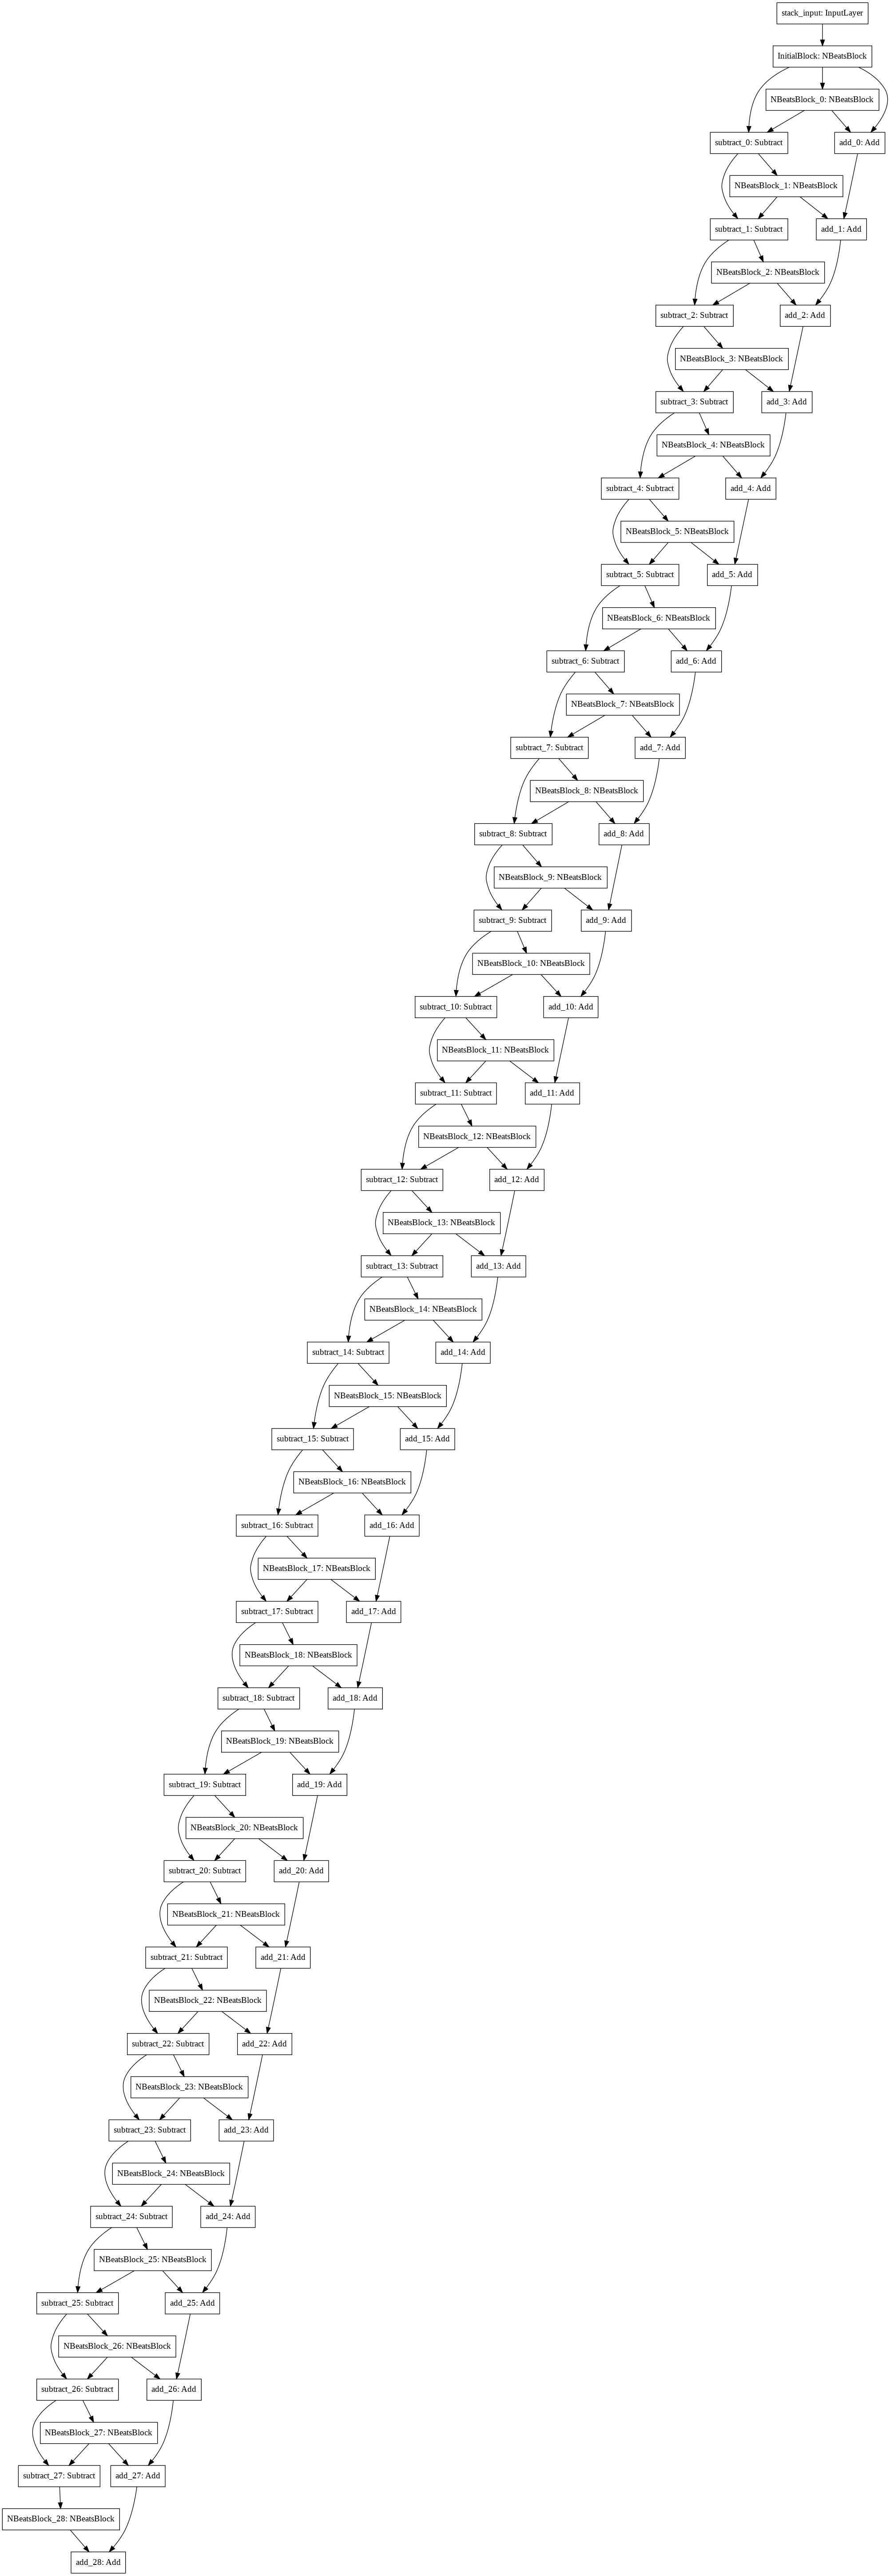

In [423]:
from tensorflow.keras.utils import plot_model
plot_model(model_7)

In [424]:
model_7.save(model_7.name)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: model_7_N-BEATS/assets


INFO:tensorflow:Assets written to: model_7_N-BEATS/assets


In [425]:
def get_ensemble_models(horizon=HORIZON, 
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10, 
                        num_epochs=100, 
                        loss_fns=["mae", "mse", "mape"]):
  """
  Returns a list of num_iter models each trained on MAE, MSE and MAPE loss.

  For example, if num_iter=10, a list of 30 trained models will be returned:
  10 * len(["mae", "mse", "mape"]).
  """
  # Make empty list for trained ensemble models
  ensemble_models = []

  # Create num_iter number of models per loss function
  for i in range(num_iter):
    # Build and fit a new model with a different loss function
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      # Construct a simple model (similar to model_1)
      model = tf.keras.Sequential([
        # Initialize layers with normal (Gaussian) distribution so we can use the models for prediction
        # interval estimation later: https://www.tensorflow.org/api_docs/python/tf/keras/initializers/HeNormal
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"), 
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(HORIZON)                                 
      ])

      # Compile simple model with current loss function
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])
      
      # Fit model
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                # Add callbacks to prevent training from going/stalling for too long
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])
      
      # Append fitted model to list of ensemble models
      ensemble_models.append(model)

  return ensemble_models # return list of trained models

In [426]:
%%time
# Get list of trained ensemble models
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=500)

Optimizing model by reducing: mae for 1000 epochs, model number: 0

Epoch 00697: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00797: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 00202: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00302: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 00513: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00613: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mae for 1000 epochs, model number: 1

Epoch 00155: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00255: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mse for 1000 epochs, model number: 1

Epoch 0

In [427]:
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data) # make predictions with current ensemble model
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [428]:
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds

<tf.Tensor: shape=(15, 100), dtype=float32, numpy=
array([[18718.326, 22867.549, 24837.703, ..., 76891.7  , 78813.6  ,
        76041.734],
       [18644.28 , 23296.137, 21717.031, ..., 68526.75 , 71216.695,
        70356.42 ],
       [17432.844, 20848.285, 22679.11 , ..., 67218.266, 63060.86 ,
        68096.44 ],
       ...,
       [18525.21 , 22141.465, 23089.613, ..., 71960.12 , 73546.19 ,
        70089.77 ],
       [17997.072, 23478.092, 23926.03 , ..., 75052.78 , 75938.17 ,
        73385.984],
       [16374.178, 19347.48 , 23171.035, ..., 72878.34 , 68367.914,
        68885.62 ]], dtype=float32)>

In [429]:
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=np.median(ensemble_preds, axis=0)) # take the median across all ensemble predictions
ensemble_results

{'mae': 13364.64,
 'mape': 9.116574,
 'mase': 1.1111871,
 'mse': 284489920.0,
 'rmse': 16866.828}

In [430]:
def get_upper_lower(preds): # 1. Take the predictions of multiple randomly initialized deep learning neural networks
  
  # 2. Measure the standard deviation of the predictions
  std = tf.math.reduce_std(preds, axis=0)
  
  # 3. Multiply the standard deviation by 1.96
  interval = 1.96 * std # https://en.wikipedia.org/wiki/1.96 

  # 4. Get the prediction interval upper and lower bounds
  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval
  return lower, upper

# Get the upper and lower bounds of the 95% 
lower, upper = get_upper_lower(preds=ensemble_preds)

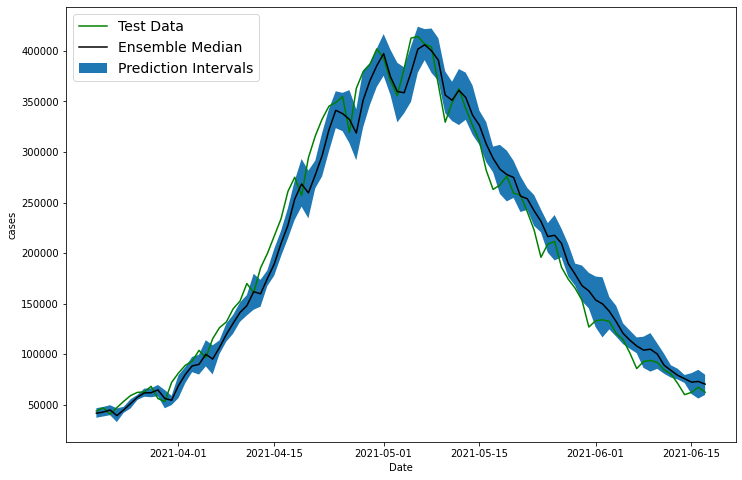

In [431]:
# Get the median values of our ensemble preds
ensemble_median = np.median(ensemble_preds, axis=0)
import matplotlib.pyplot as plt
# Plot the median of our ensemble preds along with the prediction intervals (where the predictions fall between)
offset=10
plt.figure(figsize=(12,8))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label="Test Data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("cases")
plt.fill_between(X_test.index[offset:], 
                 (lower)[offset:], 
                 (upper)[offset:], label="Prediction Intervals")
plt.legend(loc="upper left", fontsize=14);

In [432]:
cases_windowed.head()

,Daily Confirmed,cases+1,cases+2,cases+3,cases+4,cases+5,cases+6,cases+7
Date,,,,,,,,
2020-01-30,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-31,0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-01,0,0.0,1.0,NaN,NaN,NaN,NaN,NaN
2020-02-02,1,0.0,0.0,1.0,NaN,NaN,NaN,NaN
2020-02-03,1,1.0,0.0,0.0,1.0,NaN,NaN,NaN


In [433]:
#Train model on entire data to make prediction for the next day 
X_all = cases_windowed.drop(["Daily Confirmed"], axis=1).dropna().to_numpy() 
#only want prices, our future model can be a univariate model
y_all = cases_windowed.dropna()["Daily Confirmed"].to_numpy()

In [434]:
features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# 2. Combine features & labels
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<PrefetchDataset shapes: ((None, 7), (None,)), types: (tf.float64, tf.int64)>

In [435]:
tf.random.set_seed(42)

# Create model (nice and simple, just to test)
model_9 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
])

# Compile
model_9.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())

# Fit model on all of the data to make future forecasts
model_9.fit(dataset_all,
            epochs=100,
            verbose=0) # don't print out anything, we've seen this all before

In [436]:
INTO_FUTURE = 14

In [437]:
def make_future_forecast(values, model, into_future, window_size=WINDOW_SIZE) -> list:
  """
  Makes future forecasts into_future steps after values ends.

  Returns future forecasts as list of floats.
  """
  # 2. Make an empty list for future forecasts/prepare data to forecast on
  future_forecast = []
  last_window = values[-WINDOW_SIZE:] # only want preds from the last window (this will get updated)

  # 3. Make INTO_FUTURE number of predictions, altering the data which gets predicted on each time 
  for _ in range(into_future):
    
    # Predict on last window then append it again, again, again (model starts to make forecasts on its own forecasts)
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on: \n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")
    
    # Append predictions to future_forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())
    # print(future_forecast)

    # Update last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE windows)
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]
  
  return future_forecast

In [438]:
future_forecast = make_future_forecast(values=y_all,
                                       model=model_9,
                                       into_future=INTO_FUTURE,
                                       window_size=WINDOW_SIZE)

Predicting on: 
 [84574 80525 71001 60008 62215 67289 62397] -> Prediction: 88908.7890625

Predicting on: 
 [80525.        71001.        60008.        62215.        67289.
 62397.        88908.7890625] -> Prediction: 73652.1484375

Predicting on: 
 [71001.        60008.        62215.        67289.        62397.
 88908.7890625 73652.1484375] -> Prediction: 71206.34375

Predicting on: 
 [60008.        62215.        67289.        62397.        88908.7890625
 73652.1484375 71206.34375  ] -> Prediction: 62965.9140625

Predicting on: 
 [62215.        67289.        62397.        88908.7890625 73652.1484375
 71206.34375   62965.9140625] -> Prediction: 56773.47265625

Predicting on: 
 [67289.         62397.         88908.7890625  73652.1484375
 71206.34375    62965.9140625  56773.47265625] -> Prediction: 67005.2578125

Predicting on: 
 [62397.         88908.7890625  73652.1484375  71206.34375
 62965.9140625  56773.47265625 67005.2578125 ] -> Prediction: 65450.00390625

Predicting on: 
 [88908.7

In [439]:
future_forecast[:10]

[88908.79,
 73652.15,
 71206.34,
 62965.914,
 56773.473,
 67005.26,
 65450.004,
 89777.664,
 67150.41,
 74256.68]

In [440]:
def get_future_dates(start_date, into_future, offset=1):
  """
  Returns array of datetime values from ranging from start_date to start_date+horizon.

  start_date: date to start range (np.datetime64)
  into_future: number of days to add onto start date for range (int)
  offset: number of days to offset start_date by (default 1)
  """
  start_date = start_date + np.timedelta64(offset, "D") # specify start date, "D" stands for day
  end_date = start_date + np.timedelta64(into_future, "D") # specify end date
  return np.arange(start_date, end_date, dtype="datetime64[D]") # return a date range between start date and end date

In [441]:
last_timestep = daily_covid.index[-1]
last_timestep

Timestamp('2021-06-17 00:00:00', freq='D')

In [442]:
next_time_steps = get_future_dates(start_date=last_timestep, 
                                   into_future=INTO_FUTURE)
next_time_steps

array(['2021-06-18', '2021-06-19', '2021-06-20', '2021-06-21',
       '2021-06-22', '2021-06-23', '2021-06-24', '2021-06-25',
       '2021-06-26', '2021-06-27', '2021-06-28', '2021-06-29',
       '2021-06-30', '2021-07-01'], dtype='datetime64[D]')

In [443]:
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, cases[-1])
next_time_steps, future_forecast

(array(['2021-06-17', '2021-06-18', '2021-06-19', '2021-06-20',
        '2021-06-21', '2021-06-22', '2021-06-23', '2021-06-24',
        '2021-06-25', '2021-06-26', '2021-06-27', '2021-06-28',
        '2021-06-29', '2021-06-30', '2021-07-01'], dtype='datetime64[D]'),
 array([62397.   , 88908.79 , 73652.15 , 71206.34 , 62965.914, 56773.473,
        67005.26 , 65450.004, 89777.664, 67150.41 , 74256.68 , 62943.887,
        51622.527, 71241.055, 66945.21 ], dtype=float32))

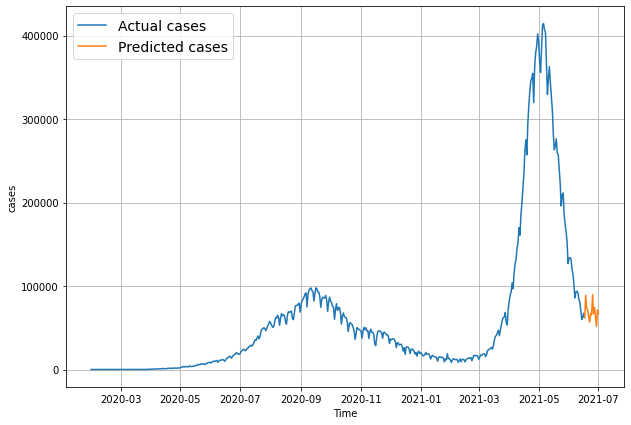

In [444]:
plt.figure(figsize=(10, 7))
plot_time_series(daily_covid.index, cases, start=1, format="-", label="Actual cases")
plot_time_series(next_time_steps[:15], future_forecast, format="-", label="Predicted cases")